In [1]:
import os, sys, ROOT                                                    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Welcome to JupyROOT 6.08/06


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data.dataloader as dataloader

from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

from mpid_data import mpid_data
from mpid_net import mpid_net, mpid_func
from __future__ import print_function
from larcv import larcv
#larcv.LArbysLoader()
import cv2

#### RUN WITH LARCV1 

In [3]:
iom = larcv.IOManager(larcv.IOManager.kREAD)
#iom.add_in_file("../MPID/input/dm_sample1_v3.root")
iom.add_in_file("../out_larcv_test.root")
iom.initialize()

True

    [NORMAL]  <IOManager::prepare_input> Opening a file in READ mode: ../out_larcv_test.root
     [ERROR]  <DataProductFactory::create::L37> Found no registered class sparseimg
     [ERROR]  <DataProductFactory::create::L37> Found no registered class clustermask
     [ERROR]  <DataProductFactory::create::L37> Found no registered class sparseimg
    [NORMAL]  <IOManager::initialize> Prepared input with 10 entries...


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available
Warning in <TClass::Init>: no dictionary for class larcv::EventSparseImage is available
Warning in <TClass::Init>: no dictionary for class larcv::SparseImage is available
Warning in <TClass::Init>: no dictionary for class larcv::EventClusterMask is available
Warning in <TClass::Init>: no dictionary for class larcv::ClusterMask is available


In [4]:
print(iom.get_n_entries())

10


In [5]:
# Access entry
iom.read_entry(6)
# Access a product instance (type,label) = (image2d,data)
image2d_data = iom.get_data("image2d","wire")
print("Retrieved data snapshot",image2d_data)

Retrieved data snapshot <ROOT.larcv::EventImage2D object at 0x88751a0>


In [6]:
whole_img = image2d_data.at(2)
whole_image=larcv.as_ndarray(whole_img)

In [7]:
whole_image.shape

(1008, 3456)

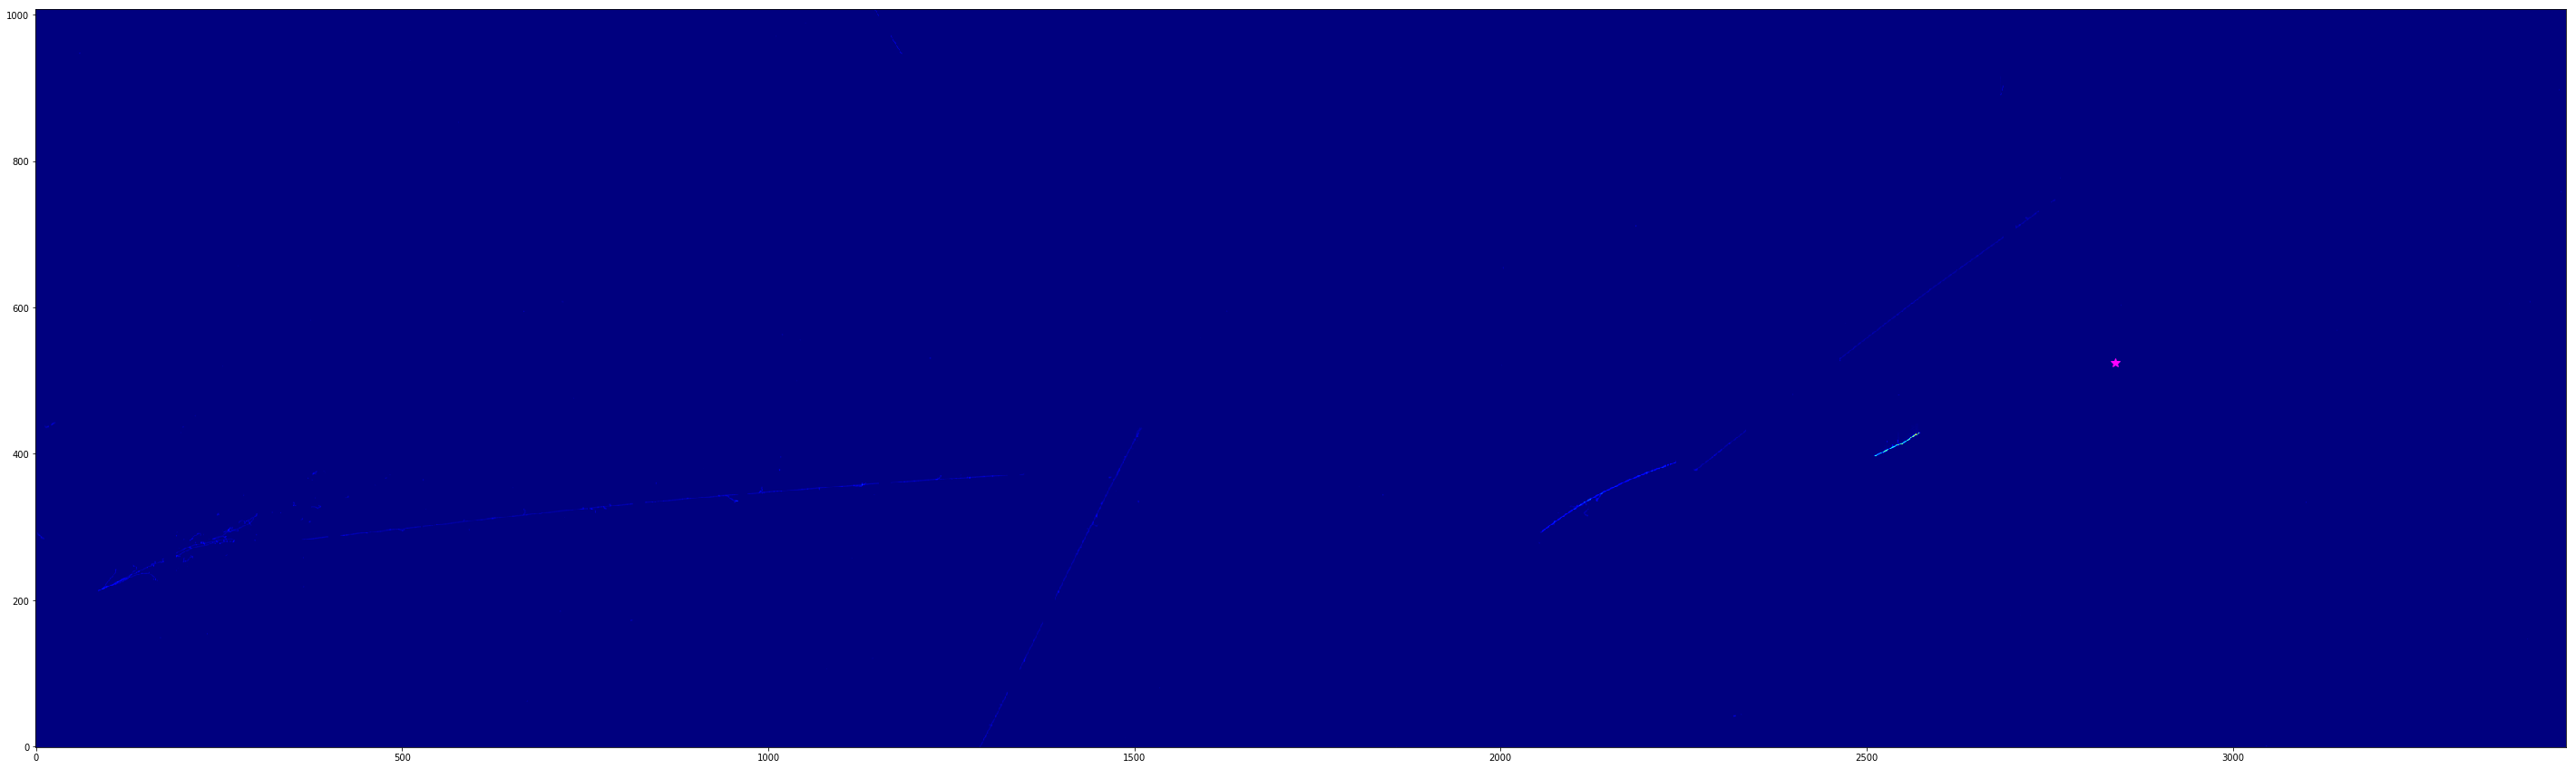

In [8]:
fig, ax1 = plt.subplots(1,1,figsize=(50,50))
ax1.imshow(whole_image, cmap="jet", origin="lower")
ax1.plot(2840, 524, "*", markersize=10, color="magenta")